# Covered here

- [Configuration & styling](#Configuration-&-styling)
- [Matplotlib, pyplot, and pylab: how are they related?](#Matplotlib,-pyplot-and-pylab:-how-are-they-related?)
- [The object hierarchy](#The-object-hierarchy)
- [Object-oriented versus stateful approaches](#Object-oriented-versus-stateful-approaches)
- [Basic plotting](#Basic-plotting)
- [Working with text](#Working-with-text)
- [Colors](#Colors)
- [Heatmaps](#Heatmaps)
- [Plotting & pandas](#Plotting-&-pandas)
- [Other](#Other)
- [QQplot](#QQplot)

# Resources & references

* [Gallery](http://matplotlib.org/gallery.html)
* [pyplot api](https://matplotlib.org/api/pyplot_api.html)
* [pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* [Matplotlib user guide](http://matplotlib.org/users/index.html)
* [Screenshots](http://matplotlib.org/users/screenshots.html)
* [Ten Simple Rules for Better Figures](http://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1003833&type=printable)
* [Cheat sheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/Matplotlib/Matplotlib.md)
* [Matplotlib examples](http://matplotlib.org/examples/index.html)
* [Parts of a figure](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)
* My Stack Overflow [favorites](https://stackoverflow.com/search?q=INFAVORITES%3A7954504+%5BMATPLOTLIB%5D) and [Q&A](https://stackoverflow.com/search?q=user%3A7954504+%5BMATPLOTLIB%5D) for Matplotlib tag

See also: 
- McKinney, _Python for Data Analysis, 2nd ed._, Chapter 9 - Plotting & Visualization
- Petrou, _Pandas Cookbook_, Chapter 11 - Visualization with Matplotlib

# Configuration & styling

See the [docs](https://matplotlib.org/users/customizing.html) on customizing Matplotlib.

You can keep your custom settings in a `matplotlibrc` file.  I keep a copy of mine on GitHub:
> https://github.com/bsolomon1124/config/blob/master/matplotlibrc

Uncomment lines you'd like to modify.

To list all available styles, use:

In [75]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


A `matplotlib` style gallery is [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

# Matplotlib, pyplot and pylab: how are they related?

`Matplotlib` is a package begun in the early 2000s to mimic Matlab's plotting functionality; `matplotlib.pyplot` is a module in matplotlib; and `pylab` is a module that gets installed alongside `matplotlib`.

Although many (outdated) examples use pylab, **it is no longer recommended**.  You should be able to get by with just these two imports at all times:

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

This guide also covers plotting of pandas objects through their plotting methods.  However, note that pandas is actually just calling matplotlib functions internally.  Seaborn also uses matplotlib under the hood.
- Pandas plotting works with aggregated (wide) data;
- Seaborn plotting works best with tidy (long) data.

In [49]:
import pandas as pd
import seaborn as sns

# The object hierarchy

Matplotlib uses a hierarchy of objects to display all plotting items.  The `Figure` and `Axes` objects are the two main components of the hierarchy.
- `Figure` is at the top of the hierarchy; it is the container for _everything_ that is plotted (could be multiple plots).  Contained within the `Figure` are 1+ `Axes` objects.
- An `Axes` is the primary object that you will interact with when building plots and can be thought of as the actual plotting surface.

An alternate explanation:

> An **axes** (note - plural here by intent) is what you think of as ‘a plot’, it is the region of the image with the data space (marked as the inner blue box). A given **figure** can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the `set_xlim()` and `set_ylim()` Axes methods). Each Axes has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`).

![](imgs/figure.png)

A **figure** in matplotlib means the whole window in the user interface. Within this figure there can be “subplots”.  The call signature for `plt.subplot` is `subplot(nrows, ncols, plot_number)`.  For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".

**Axes** are very similar to subplots but allow placement of plots at any location in the figure.  So if we want to put a smaller plot inside a bigger one we do so with axes.

![](imgs/subplots.png)

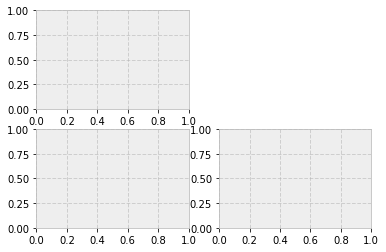

In [50]:
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)

# Object-oriented versus stateful approaches

There are two generalized interfaces for plotting:
1. Stateful approach
2. Stateless approach

Stack Overflow: [What is "stateful"?](https://stackoverflow.com/questions/24764918/what-does-it-mean-when-they-say-stateful)

## Stateful

**Stateful** approach: matplotlib implicitly keeps track of the current state of the plotting environment.  Many examples (including some here) will use _implicit_ figure and axes creation, handy for fast plots.  **With this interface, all commands will be given directly from `pyplot`** (aliased as `plt`).  MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes.  When we call `plot`, matplotlib calls `gca()` to get the current axes and gca in turn calls `gcf()` to get the current figure. If there is none it calls `figure()` to make one, strictly speaking, to make a `subplot(111)`. Let’s look at the details.

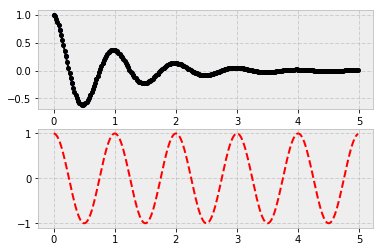

In [51]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) #optional; will be created by default, 
              # just as a subplot(111) will be created by default 
              # if you don’t manually specify any axes
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

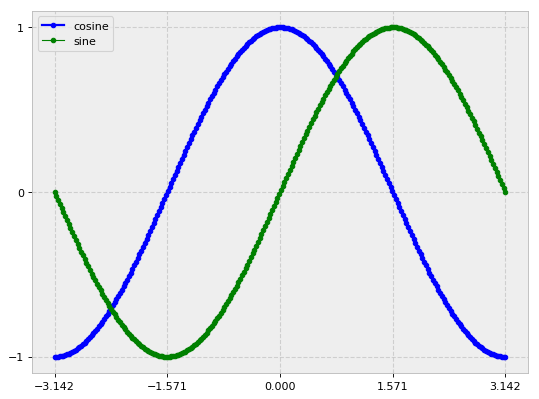

In [52]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=2.0, linestyle="-", label="cosine")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-", label="sine")

# Set x limits
plt.xlim(X.min() * 1.1, X.max() * 1.1)

# Set x ticks
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])

# Set y limits
plt.ylim(C.min() * 1.1, C.max() * 1.1)

# Set y ticks
plt.yticks([-1, 0, +1])

plt.legend(loc='upper left')

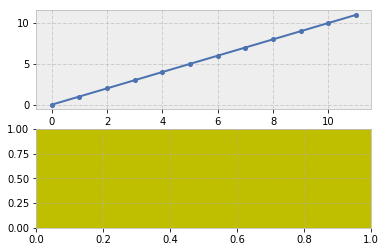

In [53]:
# plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3])

# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y') # creates 2nd subplot with yellow background

## Stateless approach

**Stateless (object-oriented)** approach: you explicitly use variables that reference specific plotting objects.  Each variable can then be used to change some property of the plot.  This approach still uses `pyplot` but only to create the `Figure` and `Axes` objects.

Text(0.5,1.08,'Figure Title')

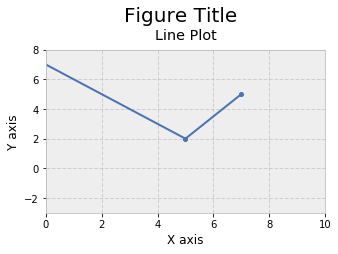

In [54]:
x = [-3, 5, 7]
y = [10, 2, 5]
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.08)

In [55]:
print(type(fig))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


# Basic plotting

Note that the examples below mostly use the **stateful** approach.

`plt.plot()` plots lines and/or markers to the `Axes`.

Text(0,0.5,'some numbers')

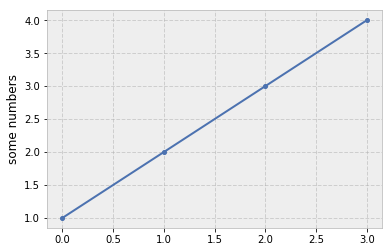

In [56]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')

In the above, you may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the `plot()` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are `[0,1,2,3]`.

The third argument in `.plot()` is the optional format string that indicates the color *and* line type of the plot.  The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is ‘b-‘, which is a solid blue line.

See here for characters & descriptions:
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

[0, 6, 0, 20]

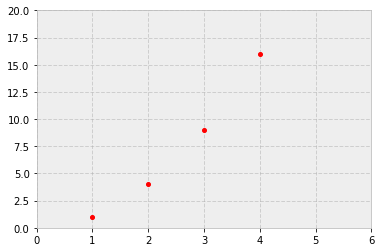

In [57]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20]) # takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes

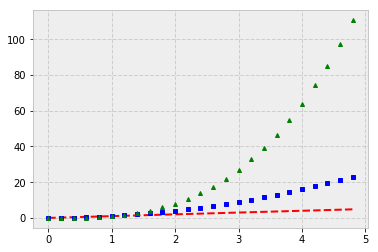

In [58]:
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

In [59]:
x = np.linspace(0.0, 3.0, num=7)

In [60]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])

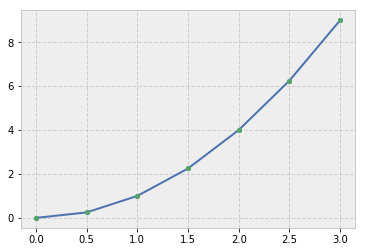

In [61]:
plt.plot(x, x ** 2,)
plt.plot(x, x ** 2, 'o') # dot plot plus line plot
# plt.show() shows the plot (not needed with interactive plots)

In [62]:
a = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]; a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

`pyplot` provides a procedural interface to the matplotlib object-oriented plotting library.

In [63]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

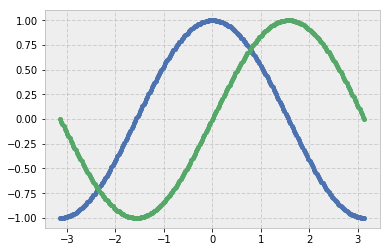

In [64]:
plt.plot(X, C)
plt.plot(X, S)

To save a file:

In [65]:
plt.savefig('image.jpg')

## Axis rotation

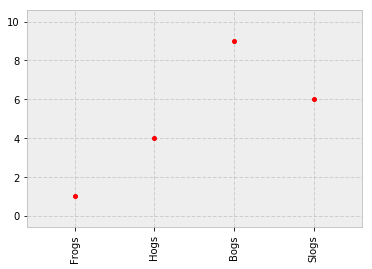

In [66]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Working with text

The `text()` command can be used to add text in an arbitrary location, and the `xlabel(), ylabel() and title()` are used to add text in the indicated locations.  See: http://matplotlib.org/users/text_intro.html#text-intro.  Note that `text()` is separate from `annotate()`.

Text(120,0.025,'the mode')

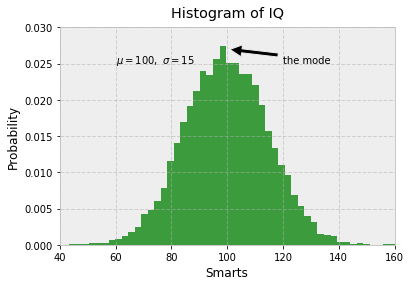

In [67]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.annotate('the mode', xy=(100, 0.027), xytext=(120, 0.025),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

Text(-0.6,4000,'$\\mu_2=0.10,\\ \\sigma_2=0.20$')

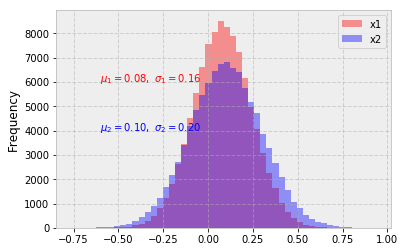

In [68]:
np.random.seed(19680801)
mu1, sigma1 = 0.08, 0.16
mu2, sigma2 = 0.10, 0.20
x1 = mu1 + sigma1 * np.random.randn(100000)
x2 = mu2 + sigma2 * np.random.randn(100000)
rets = pd.DataFrame({'x1' : x1, 'x2' : x2})
rets.plot.hist(bins=50, alpha=0.4, color=['r', 'b']) # could also use plot.kde()
plt.text(-0.6, 6000, r'$\mu_1=0.08,\ \sigma_1=0.16$', color='red')
plt.text(-0.6, 4000, r'$\mu_2=0.10,\ \sigma_2=0.20$', color='blue')

## A few more histogram examples

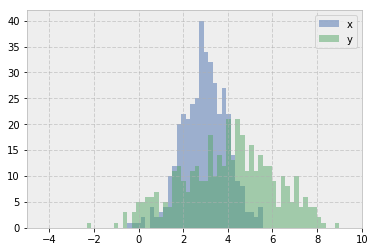

In [69]:
import random

# Plot two histograms at the same time
x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = np.linspace(-10, 10, 100)

plt.hist(x, bins, alpha=0.5, label='x')
plt.hist(y, bins, alpha=0.5, label='y')
plt.xlim(-5, 10)
plt.grid(True)
plt.legend(loc='upper right')

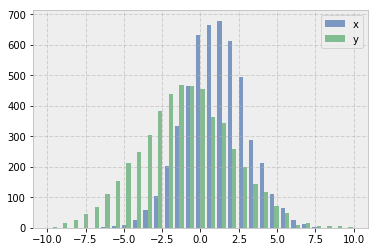

In [70]:
# Similar to above, but bars side by side
plt.style.use('seaborn-deep')

x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 5000)
data = np.vstack([x, y]).T
bins = np.linspace(-10, 10, 30)

plt.hist(data, bins, alpha=0.7, label=['x', 'y'])
plt.legend(loc='upper right')

Text(0.5,1,'Fit results: mu = 9.98,  std = 2.50')

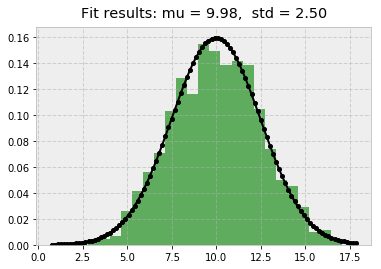

In [71]:
from scipy.stats import norm
import numpy.random as npr

# Fitting a Normal distribution to 1D data - Example 1
mu, sigma = 10, 2.5
data = npr.normal(mu, sigma, 1000)
rmu, rsigma = norm.fit(data)
# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, rmu, rsigma)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (rmu, rsigma)
plt.title(title)

In [72]:
# Fitting a Normal distribution to 1D data - Example 2
# See https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
# Verify mean and variance

print('Mean --> input: %f; actual: %f' % (mu, np.mean(data)))
print('Stdev --> input: %f; actual: %f' % (sigma, np.std(data, ddof=1)))

Mean --> input: 10.000000; actual: 9.979520
Stdev --> input: 2.500000; actual: 2.498576


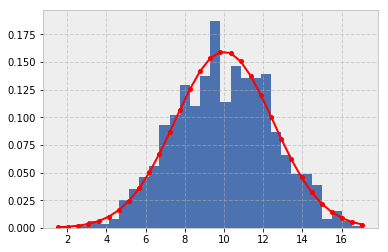

In [73]:
count, bins, ignored = plt.hist(data, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

# Colors

- http://matplotlib.org/examples/color/colormaps_reference.html

# Heatmaps

- Seaborn heatmap: http://seaborn.pydata.org/generated/seaborn.heatmap.html
- http://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe/12286958#12286958

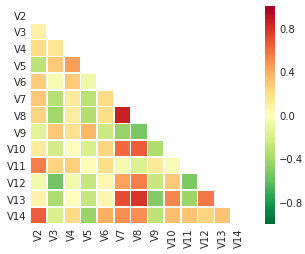

In [74]:
link = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
data = pd.read_csv(link, header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]
data.V1 = data.V1.astype(str)
X = data.loc[:, "V2":]  # independent variable data
y = data.V1  # dependent variable data

def corr_heatmap(x, mask_half=True, cmap='RdYlGn_r', vmin=-1, vmax=1, 
                 linewidths=0.5, square=True, figsize=(10,10), **vwargs):
    """Wrapper around sns.heatmap for plotting correlation matrix."""
    
    if mask_half:    
        mask = np.zeros_like(x.corr().values)
        mask[np.triu_indices_from(mask)] = True
    else:
        mask = None
    
    with sns.axes_style('white'):
        #fig, ax = plt.subplots(figsize=figsize) 
        sns.heatmap(x.corr(), cmap=cmap, vmin=vmin, vmax=vmax, linewidths=linewidths,
                    square=square, mask=mask, **vwargs)
        #plt.title('Correlation Heatmap')
        
corr_heatmap(X)

# Plotting & pandas

`.plot()` is also a standalone [method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for pandas objects.  See the pandas docs on visualization [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization).  Note that there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface.  `DataFrame.hist()` plots the histograms of the columns on multiple subplots by default.


# Other

Creating Excel charts: https://pandas-xlsxwriter-charts.readthedocs.io/

# QQPlot

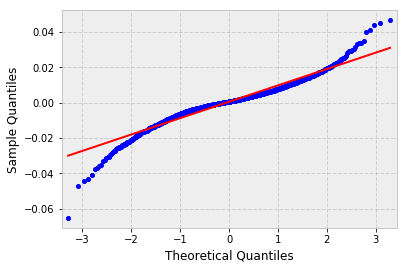

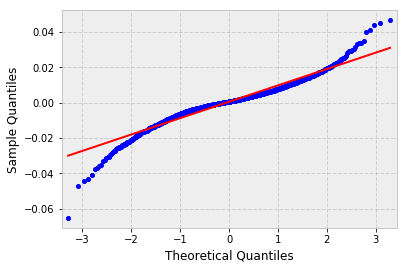

In [76]:
import statsmodels.api as sm
import pandas_datareader as pdr
rets = pdr.DataReader('SPY', 'yahoo')['Close'].pct_change().dropna()
sm.qqplot(rets, line='s') # should technically be log returns